In [64]:
%load_ext autoreload
%autoreload 2

import torch as t
import torch_geometric as ptgeo
import matplotlib.pyplot as plt

from gninvert.rule_discovery import find_model
from gninvert.gns import SingleDiffusionGN, MultiDiffusionGN
from gninvert.data_generation import get_TrainingData
from gninvert.training import graphs_loss_func
from gninvert.gnns import GNN_full

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
gn = SingleDiffusionGN(diffusion_constant=0.1)
td = get_TrainingData(gn, big=True, graphs=20)

In [3]:
td.total_graph_size()

{'nodes': 76880, 'features': 76880, 'edges': 297600}

In [4]:
tds = get_TrainingData(SingleDiffusionGN(0.1))

In [5]:
tds.total_graph_size()

{'nodes': 7600, 'features': 7600, 'edges': 13600}

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

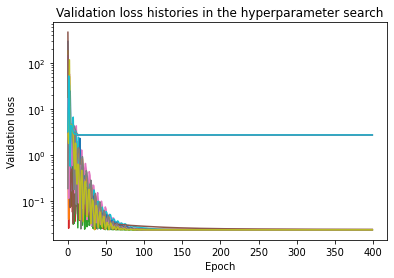

In [15]:
reses = [find_model(td, hyperparam_overrides={'epochs': 400}) for _ in range(20)]

In [76]:
 hyperparam_settings = {
            # selected as important by decision tree on big hpsearch:
            'loss_func': [t.nn.MSELoss()],
            'optimizer': ['adam'],
            'regularization_coefficient': [False],

            # other hyperparams:
            'starting_lr': [0.1],
            'lr_scheduler_dec_factor': [0.2],
            'lr_scheduler_patience': [10],
            'lr_scheduler_cooldown': [10],
            'batch_size': [2, 16],
            'adam_weight_decay': [1e-6],

            # how patient are you?
            'epochs': [100],
            
            # ARGS TO gnn (in order):
            1: [1],       # node_features
            2: [1],       # message_featuers
            3: [[64]],       # (message_)hidden_sizes
            4: [t.nn.GELU],  # (message_)nonlinearity
            5: [True]        # (message_)end_with_nonlinearity
        }

In [77]:
hyperparam_settings

{'loss_func': [MSELoss()],
 'optimizer': ['adam'],
 'regularization_coefficient': [False],
 'starting_lr': [0.1],
 'lr_scheduler_dec_factor': [0.2],
 'lr_scheduler_patience': [10],
 'lr_scheduler_cooldown': [10],
 'batch_size': [2, 16],
 'adam_weight_decay': [1e-06],
 'epochs': [100],
 1: [1],
 2: [1],
 3: [[64]],
 4: [torch.nn.modules.activation.GELU],
 5: [True]}

Number of node features: 1
Every hyperparameter setting is a list of options. Running hyperparameter search ...


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

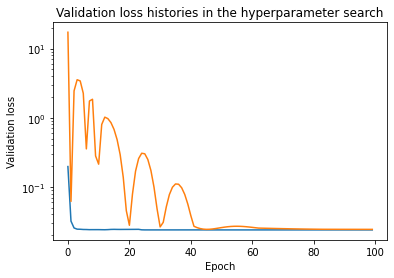

In [85]:
res = find_model(
    td,
    hyperparam_settings=hyperparam_settings,
    best_of = 1,
    seed = 14
)